**Lista de Ejercicios 1** 


Grupo:
1. Mayra Gavilán (20131530)
2. Milagros Meza (20120186)
3. Paola Cordova (20130365)
4. Serghi Arista (20125341)

**Pregunta 1**

En este ejercicio, estimará los coeficientes de un modelo de regresión lineal utilizando el conjunto de datos Boston. Tenga en cuenta que la variable objetivo es ‘crim‘, que representa la tasa de criminalidad per cápita por ciudad.

In [3]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale

In [4]:
Boston = pd.read_csv("https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/boston.csv", index_col=0)

a) Ajuste un modelo de Minimos Cuadrados Ordinarios (OLS) y estime los coeficientes mediante el atributo coef.

In [5]:
x = Boston.drop('crim', axis = 1)
y = Boston['crim']

x_scaled = scale(x)
y_scaled = scale(y)

model = LinearRegression()

model.fit(x_scaled, y_scaled)

coeficientes = pd.DataFrame(data = model.coef_, columns=["Atributo coef"], index = x.columns)
coeficientes

,Atributo coef
zn,0.123939
indus,-0.046538
chas,-0.024372
nox,-0.134146
rm,0.051373
age,-0.002776
dis,-0.247804
rad,0.619993
tax,-0.073979
ptratio,-0.076533


b) Estime manualmente los coeficientes OLS y comparelos con los resultados obtenidos en el paso anterior. Considere que los coeficientes se pueden estimar minimizando la Suma Residual de Cuadrados (RSS).

In [6]:
# 𝛽̂ =(𝑋′𝑋)−1𝑋′𝑦
Xtx = np.dot(x_scaled.T, x_scaled)
Xty = np.dot(x_scaled.T, y_scaled)

beta_manual = np.linalg.solve(Xtx, Xty)

coeficientes['Manual coef'] = beta_manual
coeficientes

,Atributo coef,Manual coef
zn,0.123939,0.123939
indus,-0.046538,-0.046538
chas,-0.024372,-0.024372
nox,-0.134146,-0.134146
rm,0.051373,0.051373
age,-0.002776,-0.002776
dis,-0.247804,-0.247804
rad,0.619993,0.619993
tax,-0.073979,-0.073979
ptratio,-0.076533,-0.076533


Se observa que los coeficientes obtenidos manualmente son iguales a los obtenidos en el literal anterior.

c) Estime los coeficientes OLS mediante el algoritmo de optimización de Descenso de Gradiente. Experimente con distintos valores para la Tasa de Aprendizaje (Learning Rate) y el Umbral de Convergencia (Convergence Threshold). Compare los coeficientes obtenidos con aquellos obtenidos en los pasos a) y b). ¿Que valores de Tasa de Aprendizaje y Umbral de Convergencia proporcionan resultados mas cercanos a los obtenidos anteriormente?

In [7]:
# Tasas de aprendizaje
alphas = [0.00001, 0.00005, 0.00008]

# Umbrales de convergencia
atols = [1e-8, 1e-12, 1e-15]

resultados_DG = []

for alpha in alphas:
    for atol in atols:
        
        w0 = np.random.uniform(size = x_scaled.shape[1])
        w1 = w0.copy()
        
        while True:
            predicciones = np.dot(x_scaled, w0)
            errores = y_scaled - predicciones
            gradiente = -2 * np.dot(x_scaled.T, errores)
            
            w1 = w0 - alpha * gradiente
            
            if np.allclose(w1, w0, atol=atol):
                break
            
            w0 = w1.copy()
        
        resultados_DG.append({'alpha': alpha, 'atol': atol, 
                              'zn': w1[0], 'indus': w1[1], 
                              'chas': w1[2], 'nox': w1[3], 
                              'rm': w1[4], 'age': w1[5],
                              'dis': w1[6], 'rad': w1[7], 
                              'tax': w1[8], 'ptratio': w1[9], 
                              'lstat': w1[10], 'medv': w1[11]
                             })

resultados_DG = pd.DataFrame(resultados_DG)
resultados_DG

,alpha,atol,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00001,1.000000e-08,0.123815,-0.046882,-0.024341,-0.134039,0.051395,-0.002836,-0.247771,0.619153,-0.072990,-0.076466,0.115365,-0.235136
1,0.00001,1.000000e-12,0.123847,-0.046795,-0.024349,-0.134068,0.051389,-0.002821,-0.247781,0.619364,-0.073238,-0.076484,0.115331,-0.235177
2,0.00001,1.000000e-15,0.123849,-0.046785,-0.024350,-0.134066,0.051388,-0.002820,-0.247777,0.619390,-0.073270,-0.076484,0.115330,-0.235177
3,0.00005,1.000000e-08,0.123915,-0.046607,-0.024366,-0.134125,0.051377,-0.002788,-0.247798,0.619824,-0.073781,-0.076520,0.115259,-0.235262
4,0.00005,1.000000e-12,0.123921,-0.046589,-0.024368,-0.134131,0.051376,-0.002785,-0.247800,0.619869,-0.073833,-0.076523,0.115252,-0.235270
5,0.00005,1.000000e-15,0.123921,-0.046589,-0.024368,-0.134131,0.051376,-0.002785,-0.247800,0.619869,-0.073834,-0.076523,0.115252,-0.235270
6,0.00008,1.000000e-08,0.123924,-0.046581,-0.024368,-0.134133,0.051375,-0.002783,-0.247800,0.619887,-0.073855,-0.076525,0.115249,-0.235273
7,0.00008,1.000000e-12,0.123928,-0.046570,-0.024370,-0.134136,0.051375,-0.002781,-0.247801,0.619916,-0.073889,-0.076527,0.115245,-0.235279
8,0.00008,1.000000e-15,0.123928,-0.046570,-0.024370,-0.134136,0.051375,-0.002781,-0.247801,0.619915,-0.073888,-0.076527,0.115245,-0.235279


A partir de la estimación de los coeficientes OLS mediante el método de optimización de Descenso de Gradiente para tres (03) tasas de aprendizajes y umbrales de convergencia diferentes, se observó que la misma tasa de aprendizaje en diferentes umbrales de convergencia presentaba coeficientes similares, por lo que los valores obtenidos entre el atol 1e-12 y 1e-15 no difieren. Así, como se observa en la tabla de arriba, la mayor tasa de aprendizaje ha podido obtener coeficientes mucho más cercanos a los obtenidos en los literales (a) y (b). En consencuencia, hemos optado por seleccionar el alpha 0.00008 y el atol 1e-12.

In [8]:
alpha = 0.00008
atol = 1e-12

DG_coef = resultados_DG[(resultados_DG['alpha']== alpha) & (resultados_DG['atol']== atol)].drop(['alpha', 'atol'], axis=1).transpose()

coeficientes['DG coef'] = DG_coef
coeficientes

,Atributo coef,Manual coef,DG coef
zn,0.123939,0.123939,0.123928
indus,-0.046538,-0.046538,-0.046570
chas,-0.024372,-0.024372,-0.024370
nox,-0.134146,-0.134146,-0.134136
rm,0.051373,0.051373,0.051375
age,-0.002776,-0.002776,-0.002781
dis,-0.247804,-0.247804,-0.247801
rad,0.619993,0.619993,0.619916
tax,-0.073979,-0.073979,-0.073889
ptratio,-0.076533,-0.076533,-0.076527


**Pregunta 2**

El objetivo de este ejercicio es ilustrar cómo el trade-off entre sesgo y varianza evoluciona con la
creciente complejidad de los modelos polinómicos. Para este propósito, utilice el conjunto de datos
Portafolio. Considere los siguientes pasos:

In [ ]:
!pip install mlxtend

In [3]:
import numpy as np
import pandas as pd
import requests

# Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.model_selection import train_test_split

# Scipy
from scipy.interpolate import UnivariateSpline

# Bias-Variance Decomposition
from mlxtend.evaluate import bias_variance_decomp

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
portfolio = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/portafolio.csv')

portfolio = portfolio.drop('Unnamed: 0', axis=1)

portfolio = portfolio.dropna()

a) **División del conjunto de datos:** Separe los datos en un conjunto de entrenamiento y otro
de prueba, asignando el 20% de los datos al conjunto de prueba.

In [5]:
tot_obs = portfolio.shape[0]
idx = np.random.choice(tot_obs, size=int(0.8 * tot_obs), replace=False)
training_sample = portfolio.iloc[idx]
testing_sample = portfolio.drop(idx)

b) **Ajuste de modelos polinómicos:** Implemente un bucle para ajustar modelos de regresi´on
polinomial desde grado 1 hasta grado 8. *Hint:* considere las funciones PolynomialFeatures
y LinearRegression de Scikit-Learn.

In [6]:
models = {}

for degree in range(1, 9):
    # Crear características polinomiales
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(training_sample[['X']])
    X_poly_test = poly_features.transform(testing_sample[['X']])

    # Nombre del modelo
    model_name = 'model{}'.format(degree)

    # Crear y ajustar el modelo de regresión lineal
    exec("{} = LinearRegression()".format(model_name))
    exec("{}.fit(X_poly_train, training_sample['Y'])".format(model_name))

    models[model_name] = eval(model_name)

c) **Descomposición sesgo-varianza:** Dentro del mismo bucle, calcule la descomposición de
sesgo-varianza para cada modelo, tanto en el conjunto de entrenamiento como en el de prueba.
*Hint:* considere la librería mlxtend.

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from mlxtend.evaluate import bias_variance_decomp

# Dividir los datos en conjuntos de entrenamiento y prueba
X = portfolio['X'].values.reshape(-1, 1)
y = portfolio['Y'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# Diccionario para almacenar modelos
models = {}

# Lista para almacenar resultados
results = []

# Bucle para ajustar modelos con diferentes grados de polinomios
for degree in range(1, 9):
    # Crear características polinomiales
    poly_features = PolynomialFeatures(degree=degree)
    X_poly_train = poly_features.fit_transform(X_train)
    X_poly_test = poly_features.transform(X_test)

    # Nombre del modelo
    model_name = 'model{}'.format(degree)

    # Crear y ajustar el modelo de regresión lineal
    exec('{} = LinearRegression()'.format(model_name))
    exec('{}.fit(X_poly_train, y_train)'.format(model_name))

    # Almacenar el modelo en el diccionario
    models[model_name] = eval(model_name)

    # Calcular descomposición de sesgo-varianza para los datos de entrenamiento
    avg_expected_loss_train, avg_bias_train, avg_var_train = bias_variance_decomp(models[model_name], X_poly_train, y_train, X_poly_train, y_train, loss='mse', num_rounds=200, random_seed=123)

    # Calcular descomposición de sesgo-varianza para los datos de prueba
    avg_expected_loss_test, avg_bias_test, avg_var_test = bias_variance_decomp(models[model_name], X_poly_train, y_train, X_poly_test, y_test, loss='mse', num_rounds=200, random_seed=123)

    # Almacenar resultados en la lista
    results.append({
        "Model": model_name,
        "MSE_train": avg_expected_loss_train,
        "Bias_train": avg_bias_train,
        "Variance_train": avg_var_train,
        "MSE_test": avg_expected_loss_test,
        "Bias_test": avg_bias_test,
        "Variance_test": avg_var_test
    })

# Crear DataFrame de pandas a partir de los resultados
results_df = pd.DataFrame(results)
results_df

,Model,MSE_train,Bias_train,Variance_train,MSE_test,Bias_test,Variance_test
0,model1,1.042061,1.010465,0.031597,0.752238,0.717926,0.034312
1,model2,1.029451,0.988014,0.041437,0.791126,0.748112,0.043014
2,model3,1.028160,0.963148,0.065012,0.787005,0.727915,0.059090
3,model4,1.037108,0.944248,0.092860,0.873093,0.805205,0.067888
4,model5,1.148465,0.937910,0.210556,0.874054,0.749826,0.124227
5,model6,1.819503,0.965153,0.854350,1.025550,0.772749,0.252802
6,model7,6.658107,0.946957,5.711150,1.310188,0.868230,0.441958
7,model8,26.228745,1.053735,25.175010,6.428480,0.875146,5.553334


d) **Visualización:** Grafique cómo sesgo, varianza y error cuadrático medio (MSE) varíaan con la
complejidad del modelo (grados polinómicos) para ambos conjuntos, entrenamiento y prueba.

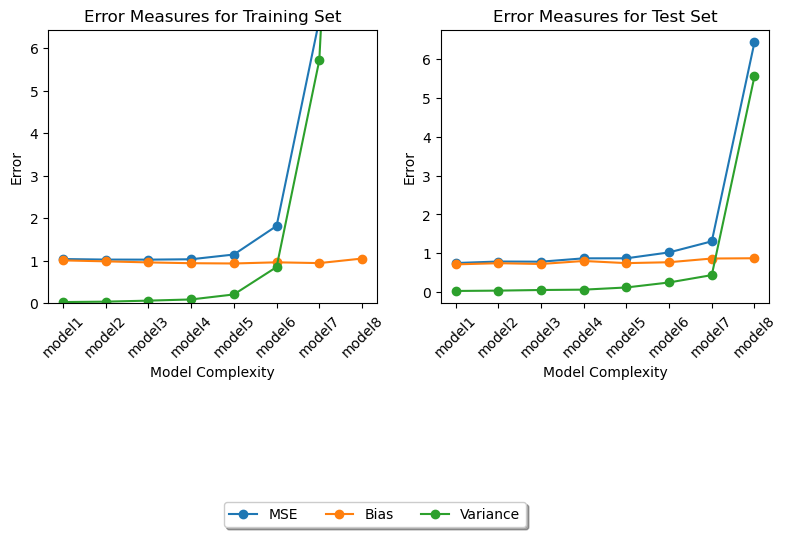

In [9]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

# Plot metrics for training set
ax1.plot(results_df['Model'], results_df['MSE_train'], marker='o', label='MSE')
ax1.plot(results_df['Model'], results_df['Bias_train'], marker='o', label='Bias')
ax1.plot(results_df['Model'], results_df['Variance_train'], marker='o', label='Variance')
ax1.set_title('Error Measures for Training Set')
ax1.set_xlabel('Model Complexity')
ax1.set_ylabel('Error')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, max(results_df[['MSE_train', 'Bias_train', 'Variance_train']].max()))

# Plot metrics for test set
ax2.plot(results_df['Model'], results_df['MSE_test'], marker='o', label='MSE')
ax2.plot(results_df['Model'], results_df['Bias_test'], marker='o', label='Bias')
ax2.plot(results_df['Model'], results_df['Variance_test'], marker='o', label='Variance')
ax2.set_title('Error Measures for Test Set')
ax2.set_xlabel('Model Complexity')
ax2.set_ylabel('Error')
ax2.tick_params(axis='x', rotation=45)
ax1.set_ylim(0, max(results_df[['MSE_test', 'Bias_test', 'Variance_test']].max()))

# Adjust and show the plot
plt.tight_layout()
handles, labels = ax1.get_legend_handles_labels()
ax2.legend(handles, labels, loc='upper center', bbox_to_anchor=(-0.2, -0.70), shadow=True, ncol=len(labels))

plt.show()

**Pregunta 3**

Sobre k-fold Cross-Validation:

a) Explique cómo se implementa el enfoque k-fold Cross-Validation

- Se tiene un parámetro k, correspondiente al número de grupos en los que se divide una muestra de datos dada.
- Se divide el conjunto de datos en k subconjuntos (pliegue o 'fold') de manera consecutiva.
-  El primer grupo es tratado como grupo de validación y el método de aprendizaje es usado con los k-1 grupos. Se registra la métrica de evaluación para esta primera iteración.
- Se repite el proceso k veces, utilizando diferentes subconjuntos como grupo de validación en cada iteración. Con ello, se promedia las puntuaciones del modelo en cada proceso para calcular el rendimiento promedio y, por ende, el rendimiento general del modelo.
- En python se utilizaría la clase **Kfold** dentro de la librería *scikit-learn*. Requiere 3 parámetros: 
    
    KFold(n_splits=k, random_state=None, shuffle=False)


b) Detalle cuáles son las ventajas y desventajas del enfoque k-fold Cross-Validation con respecto
 a:
     I. El enfoque del Conjunto de Validación

**Ventajas** 
- El *K-fold Cross Validation* reduce la variabilidad en la estimación del rendimiento porque promedia resultados de k grupos de validación diferentes. En cambio, el *Conjunto de Validación* presenta una estimación sesgada, dependiendo de cómo se divide el conjunto de datos de entrenamiento y validación.
**Desventajas**
- El *K-fold Cross Validation* es más costoso computacionalmente, por lo que el *Conjunto de Validación* sería más conveniente en caso de base de datos pequeña, con una implementación más simple de entender.

    II. El enfoque de Validación Cruzada Dejando Uno Afuera (LOOCV)

**Ventajas** 
- Estimación más precisa del error de predicción por parte del *K-fold Cross Validation*. Como promedia los resultados sobre k conjuntos de validación diferentes se reduce la variabilidad. En cambio, se puede tener alta varianza en las estimaciones de error del método *LOOCV*, lo cual lleva a resultados menos confiables.
- A pesar de que puede ser más costoso computacionalmente, el *K-fold Cross Validation* es más eficiente que el método *LOOCV*, que entrena un modelo por cada muestra en el conjunto de datos.
**Desventajas**
- El *K-fold Cross Validation* entrena en un subconjunto más pequeño de datos en cada iteración, por lo que puede tener un sesgo en la estimación del error de prueba. Al contrario, en *LOOCV* este sesgo se reduce, especialmente con un tamaño de base de datos pequeño, al entrenar el modelo en n-1 muestras y evaluado en una sola.


**Pregunta 4**

A continuación implementará Cross-Validation para un conjunto de datos simulado. Considere los siguientes pasos:

In [1]:
import numpy as np
import pandas as pd
from functools import partial

# Scikit-Learn
from sklearn.model_selection import \
    (cross_validate,
     train_test_split,
     KFold,
     ShuffleSplit)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.base import clone

# Statsmodels
import statsmodels.api as sm

# Matplotlib
import matplotlib.pyplot as plt

a) Genere el conjunto de datos simulado de la siguiente manera:

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

# Imprimir los primeros 10 valores de x y y para verificar
print("Valores de x:")
print(x[:10])
print("\nValores de y:")
print(y[:10])

Valores de x:
[ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Valores de y:
[-0.54455369  0.33395019 -0.01353233 -4.03044153  0.48486098  0.43080364
 -1.98931193 -1.60859703  1.85213045  0.00981245]


En este conjunto de datos, ¿cúal es n (número de observaciones) y cuúal es p (número de variables predictoras)? Escriba el modelo utilizado para generar los datos en forma de ecuación.

En este modelo, ``y`` es el número de observaciones y ``x`` el número de variables predictoras.

In [3]:
# Escriba el modelo utilizado para generar los datos en forma de ecuación.

rng = np.random.default_rng(1)

# Generar valores de x utilizando la distribución normal
mu_x = 0
sigma_x = 1
x1 = mu_x + sigma_x * rng.standard_normal(size=100)

# Generar valores de y utilizando la distribución normal
mu_y = 0
sigma_y = 1
y1 = x - 2 * x**2 + mu_y + sigma_y * rng.standard_normal(size=100)

# Imprimir los primeros 10 valores de x y y para verificar
print("Valores de x:")
print(x1[:10])
print("\nValores de y:")
print(y1[:10])

Valores de x:
[ 0.34558419  0.82161814  0.33043708 -1.30315723  0.90535587  0.44637457
 -0.53695324  0.5811181   0.3645724   0.2941325 ]

Valores de y:
[-0.54455369  0.33395019 -0.01353233 -4.03044153  0.48486098  0.43080364
 -1.98931193 -1.60859703  1.85213045  0.00981245]


b) Establezca una semilla aleatoria y luego calcule los errores LOOCV que resultan de ajustar los siguientes cuatro modelos polinomiales usando m ́ınimos cuadrados:

In [4]:
cv_error = np.zeros(4)

M = LinearRegression()

for i, d in enumerate(range(1,5)):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(x.reshape(-1, 1))
    M_CV = cross_validate(M, X_poly, y, cv = 100, scoring = 'neg_mean_squared_error')
    cv_error[i] = abs(np.mean(M_CV['test_score']))
cv_error

array([6.63302984, 1.12293686, 1.30179655, 1.33239427])

c) Repita el punto b) usando otra semilla aleatoria e informe sus resultados. ¿Son sus resultados iguales a los que obtuvo en b)? ¿Por qué?

In [5]:
# c) Corriendo LOOCV con 2 semillas diferentes
num_runs = 2
degree_range = 4


cv_errors = np.zeros((degree_range, num_runs))

for i in range(num_runs):
    cv = KFold(n_splits=100, shuffle=True, random_state=i)

    for j, d in enumerate(range(1, degree_range + 1)):
        poly = PolynomialFeatures(degree=d)
        X_poly = poly.fit_transform(x.reshape(-1, 1))
        
        M_CV = cross_validate(LinearRegression(), X_poly, y, cv=cv, scoring='neg_mean_squared_error')
        cv_errors[j, i] = abs(np.mean(M_CV['test_score']))


cv_errors_df = pd.DataFrame(cv_errors, 
                            index=[f'Degree {d + 1}' for d in range(degree_range)],
                            columns=[f'Run {i + 1}' for i in range(num_runs)])

cv_errors_df

,Run 1,Run 2
Degree 1,6.633030,6.633030
Degree 2,1.122937,1.122937
Degree 3,1.301797,1.301797
Degree 4,1.332394,1.332394


Los resultados del error cuadrático medio (MSE) en ambos casos son los mismos. Esto se debe a que cuando se cambia la semilla aleatoria en LOOCV, no se está cambiando la forma en que se separan los datos en conjuntos de entrenamiento y prueba en cada iteración. Así, en cada iteración, el conjunto de entrenamiento siempre consiste en todas las observaciones excepto una, y el conjunto de prueba es esa observación única. Esto se repite por el número total de observaciones. Por lo tanto, aunque se cambie la semilla aleatoria, los datos de entrenamiento y prueba siguen siendo los mismos, lo que resulta en el mismo rendimiento del modelo para diferentes semillas (mismo MSE).

d) ¿Cuál de los modelos en c) tuvo el error LOOCV más pequeño? ¿Esperaba ese resultado? Explique su respuesta.

El polinomio de grado 2 tuvo el error cuadrático medio (MSE) más bajo. Esto sugiere que el modelo de grado 2 se ajusta mejor a los datos que los modelos más simples o más complejos.

Si se aumenta la complejidad del modelo más allá del polinomia de grado 2, no se observa una disminución adicional en el MSE. Esto sugiere que agregar más complejidad al modelo no mejora su capacidad para hacer predicciones más precisas.

En cambio, lo que parece estar sucediendo es que al aumentar la complejidad del modelo, estás aumentando la varianza del modelo en una proporción mayor que la reducción en el sesgo. Esto puede llevar a un sobreajuste (overfitting), donde el modelo se ajusta demasiado a los los datos de entrenamiento y no generaliza bien a nuevos datos.